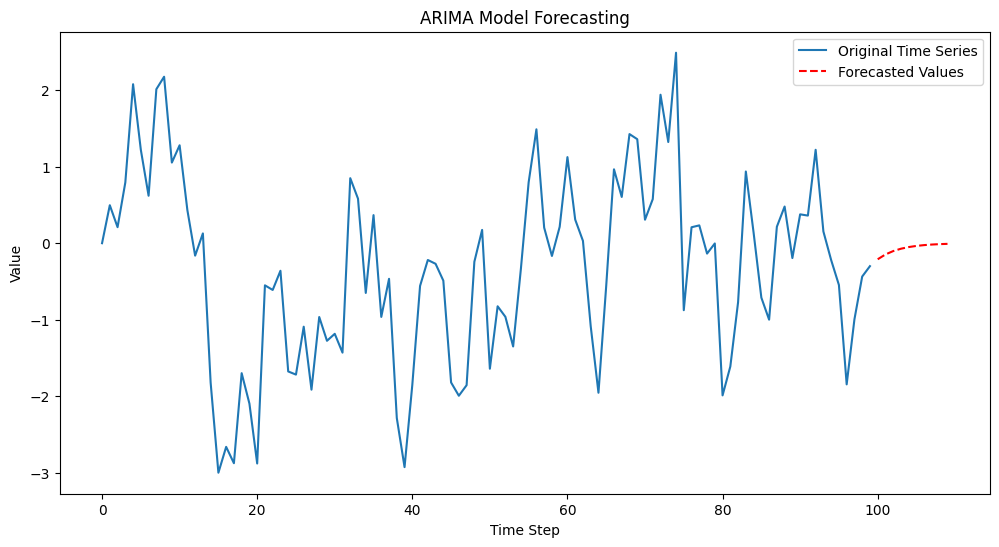

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Toy Data (AR(1) process)
np.random.seed(42)
n_steps = 100
ar_coefficient = 0.7
noise_variance = 1
x = np.zeros(n_steps)

for t in range(1, n_steps):
    x[t] = ar_coefficient * x[t - 1] + np.random.normal(0, np.sqrt(noise_variance))

# Step 2: Define Differencing Function
def difference(series, order=1):
    diff = []
    for i in range(order, len(series)):
        diff.append(series[i] - series[i - order])
    return np.array(diff)

# Step 3: Define AR and MA Functions
def autoregression(series, p):
    X = np.zeros((len(series) - p, p))
    y = np.zeros(len(series) - p)
    
    for t in range(p, len(series)):
        X[t - p] = series[t - p:t]
        y[t - p] = series[t]
    
    coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
    return coefficients

def moving_average(series, residuals, q):
    X = np.zeros((len(residuals) - q, q))
    y = np.zeros(len(residuals) - q)
    
    for t in range(q, len(residuals)):
        X[t - q] = residuals[t - q:t]
        y[t - q] = residuals[t]
    
    coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
    return coefficients

# Step 4: Implement ARIMA Forecasting
def arima_forecast(series, p, d, q, n_forecasts=10):
    if d > 0:
        differenced_series = difference(series, d)
    else:
        differenced_series = series
    
    ar_coefficients = autoregression(differenced_series, p)
    
    residuals = []
    for t in range(p, len(differenced_series)):
        predicted = np.dot(ar_coefficients, differenced_series[t - p:t])
        residuals.append(differenced_series[t] - predicted)
    residuals = np.array(residuals)
    
    ma_coefficients = moving_average(differenced_series, residuals, q)
    
    forecasts = list(series[-p:])
    for _ in range(n_forecasts):
        ar_part = np.dot(ar_coefficients, forecasts[-p:])
        ma_part = np.dot(ma_coefficients, residuals[-q:])
        forecast = ar_part + ma_part
        forecasts.append(forecast)
    
    return forecasts[-n_forecasts:]

# Step 5: Apply ARIMA model and plot results
p = 1
d = 0
q = 1
forecasts = arima_forecast(x, p, d, q, n_forecasts=10)

plt.figure(figsize=(12, 6))
plt.plot(range(n_steps), x, label='Original Time Series')
plt.plot(range(n_steps, n_steps + 10), forecasts, label='Forecasted Values', color='red', linestyle='--')
plt.title('ARIMA Model Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()
